#**NLP Project Round - 1**

**THE MAIN TASK OF THIS ROUND IS TO:-** 
 
1) Import the text, lets call it as T1 and T2 (books that you have downloaded)

2) Perform simple text pre-processing steps and tokenize the text T1 and T2 — remove the running section and chapter names in the process.

3) Analyze the frequency distribution of tokens in T1 and T2 separately.

4) Create a Word Cloud of T1 and T2 using the token that you have got.

5) Remove the stop words from T1 and T2 and then again create a word cloud - Note the difference it gives when you compare with word cloud got before the removal of stop words.

6) Evaluate the relationship between the word length and frequency for both T1 and T2.

7) Do PoS Tagging for both T1 and T2 using anyone of the four tag sets studied in the class and get the distribution of various tags.

**For this project the main library we will be using is NLTK (Natural Language Processing ToolKit)**

In [7]:
#imports
import nltk
from nltk.tokenize import word_tokenize #for tokenizing the words
from nltk.stem import PorterStemmer #For potter stemming
from nltk.stem import WordNetLemmatizer #for lemmatization/to get lemma of the word
from nltk.corpus import stopwords       #To remove stop words
from urllib.request import urlopen

import inflect
import re #for the purpose of regular expressions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [11]:
p = inflect.engine()
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

**1) Importing the text using the urlib**

In [12]:
#URLs for Books
url1 = 'https://www.gutenberg.org/cache/epub/1727/pg1727.txt' #Odyssey
url2 = 'https://www.gutenberg.org/files/345/345-0.txt'        #Dracula

In [13]:
#first we will read both the books and print few initial lines
T1_odyssey = urlopen(url1).read()
T2_dracula = urlopen(url2).read()

In [14]:
T1_odyssey

b'\xef\xbb\xbfThe Project Gutenberg eBook of The Odyssey, by Homer\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: The Odyssey\r\n\r\nAuthor: Homer\r\n\r\nTranslator: Samuel Butler\r\n\r\nRelease Date: April, 1999 [eBook #1727]\r\n[Most recently updated: October 24, 2021]\r\n\r\nLanguage: English\r\n\r\n\r\nProduced by: Jim Tinsley and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE ODYSSEY ***\r\n\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nThe Odyssey\r\n\r\nby Homer\r\n\r\nrendered into English prose for the use of those who cannot read the\r\nori

In [15]:
T2_dracula

b'\xef\xbb\xbfThe Project Gutenberg eBook of Dracula, by Bram Stoker\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Dracula\r\n\r\nAuthor: Bram Stoker\r\n\r\nRelease Date: October, 1995 [eBook #345]\r\n[Most recently updated: March 12, 2021]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Chuck Greif and the Online Distributed Proofreading Team\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK DRACULA ***\r\n\r\n\r\n\r\n\r\n                                DRACULA\r\n\r\n\r\n\r\n\r\n\r\n                                DRACULA\r\

In [16]:
T1_odyssey = T1_odyssey.decode('utf-8')

In [17]:
T2_dracula = T2_dracula.decode('utf-8')

**2) Performing simple text-preprocessing step and tokenizing both T1_odeyssey and T2_dracula**

2.1) Removing all the unecessary text from the files.

In [18]:
def discard_from_odessey(text):
    sidx = text.find('THE ODYSSEY')
    eidx = text.find('*** END OF THE PROJECT GUTENBERG EBOOK THE ODYSSEY ***')
    print("Discarding Before - ", sidx)
    print("Discarding After - ", eidx)
    text = text[sidx:eidx]
    return text

In [19]:
def discard_from_dracula(text):
    sidx = text.find('DRACULA')
    eidx = text.find('*** END OF THE PROJECT GUTENBERG EBOOK DRACULA ***')
    print("Discarding Before - ", sidx)
    print("Discarding After - ", eidx)
    text = text[sidx:eidx]
    return text

In [20]:
T1_odyssey = discard_from_odessey(T1_odyssey)

Discarding Before -  772
Discarding After -  691478


In [21]:
T2_dracula = discard_from_dracula(T2_dracula)

Discarding Before -  805
Discarding After -  862449


In [22]:
T1_odyssey

'THE ODYSSEY ***\r\n\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nThe Odyssey\r\n\r\nby Homer\r\n\r\nrendered into English prose for the use of those who cannot read the\r\noriginal\r\n\r\nContents\r\n\r\n PREFACE TO FIRST EDITION\r\n PREFACE TO SECOND EDITION\r\n THE ODYSSEY\r\n BOOK I.\r\n BOOK II.\r\n BOOK III.\r\n BOOK IV.\r\n BOOK V.\r\n BOOK VI.\r\n BOOK VII.\r\n BOOK VIII.\r\n BOOK IX.\r\n BOOK X.\r\n BOOK XI.\r\n BOOK XII.\r\n BOOK XIII.\r\n BOOK XIV.\r\n BOOK XV.\r\n BOOK XVI.\r\n BOOK XVII.\r\n BOOK XVIII.\r\n BOOK XIX.\r\n BOOK XX.\r\n BOOK XXI.\r\n BOOK XXII.\r\n BOOK XXIII.\r\n BOOK XXIV.\r\n FOOTNOTES:\r\n\r\n\r\nAL PROFESSORE\r\nCAV. BIAGIO INGROIA,\r\nPREZIOSO ALLEATO\r\nL’AUTORE RICONOSCENTE.\r\n\r\n\r\n\r\n\r\nPREFACE TO FIRST EDITION\r\n\r\n\r\nThis translation is intended to supplement a work entitled “The\r\nAuthoress of the Odyssey”, which I published in 1897. I could not give\r\nthe whole “Odyssey” in that book without making it unwieldy, I\r\ntherefore epitomised my tra

In [23]:
T2_dracula

'DRACULA ***\r\n\r\n\r\n\r\n\r\n                                DRACULA\r\n\r\n\r\n\r\n\r\n\r\n                                DRACULA\r\n\r\n                                  _by_\r\n\r\n                              Bram Stoker\r\n\r\n                        [Illustration: colophon]\r\n\r\n                                NEW YORK\r\n\r\n                            GROSSET & DUNLAP\r\n\r\n                              _Publishers_\r\n\r\n      Copyright, 1897, in the United States of America, according\r\n                   to Act of Congress, by Bram Stoker\r\n\r\n                        [_All rights reserved._]\r\n\r\n                      PRINTED IN THE UNITED STATES\r\n                                   AT\r\n               THE COUNTRY LIFE PRESS, GARDEN CITY, N.Y.\r\n\r\n\r\n\r\n\r\n                                   TO\r\n\r\n                             MY DEAR FRIEND\r\n\r\n                               HOMMY-BEG\r\n\r\n\r\n\r\n\r\nContents\r\n\r\nCHAPTER I. Jonathan Harker’s

In [24]:
T1_odyssey = T1_odyssey.lower()
T2_dracula = T2_dracula.lower()

2.2) Using regular expression to decontract certain words to normal form for better text understanding

In [25]:
def transforming(text):
    #removing URL
    text = re.sub(r"http\s+", "", text)

    #Decontracting most common words
    text = re.sub(r"couldn\'t", "could not", text) 
    text = re.sub(r"aren\'t", "are not", text) 
    text = re.sub(r"won\'t", "will not", text) 
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [26]:
T1_odyssey = transforming(T1_odyssey)
T2_dracula = transforming(T2_dracula)

2.3) Tokenizing the both the book

In [27]:
def tokenizing_book(text):
    tokens = text.split()
    final_word_bag = []

    for word in tokens:
        if word.isdigit():
            converted_word = p.number_to_words(word)
            final_word_bag.append(converted_word)
        else:
            final_word_bag.append(word)
        
    return ' '.join(final_word_bag)

In [28]:
T1_odyssey = tokenizing_book(T1_odyssey)
T2_dracula = tokenizing_book(T2_dracula)

In [29]:
T1_odyssey

'the odyssey *** [illustration] the odyssey by homer rendered into english prose for the use of those who cannot read the original contents preface to first edition preface to second edition the odyssey book i. book ii. book iii. book iv. book v. book vi. book vii. book viii. book ix. book x. book xi. book xii. book xiii. book xiv. book xv. book xvi. book xvii. book xviii. book xix. book xx. book xxi. book xxii. book xxiii. book xxiv. footnotes: al professore cav. biagio ingroia, prezioso alleato l’autore riconoscente. preface to first edition this translation is intended to supplement a work entitled “the authoress of the odyssey”, which i published in 1897. i could not give the whole “odyssey” in that book without making it unwieldy, i therefore epitomised my translation, which was already completed and which i now publish in full. i shall not here argue the two main points dealt with in the work just mentioned; i have nothing either to add to, or to withdraw from, what i have there 

In [30]:
T2_dracula

'dracula *** dracula dracula _by_ bram stoker [illustration: colophon] new york grosset & dunlap _publishers_ copyright, 1897, in the united states of america, according to act of congress, by bram stoker [_all rights reserved._] printed in the united states at the country life press, garden city, n.y. to my dear friend hommy-beg contents chapter i. jonathan harker’s journal chapter ii. jonathan harker’s journal chapter iii. jonathan harker’s journal chapter iv. jonathan harker’s journal chapter v. letters—lucy and mina chapter vi. mina murray’s journal chapter vii. cutting from “the dailygraph,” eight august chapter viii. mina murray’s journal chapter ix. mina murray’s journal chapter x. mina murray’s journal chapter xi. lucy westenra’s diary chapter xii. dr. seward’s diary chapter xiii. dr. seward’s diary chapter xiv. mina harker’s journal chapter xv. dr. seward’s diary chapter xvi. dr. seward’s diary chapter xvii. dr. seward’s diary chapter xviii. dr. seward’s diary chapter xix. jon

2.4) Removing non-alphabatic characters

In [31]:
def remove_non_alpha(text):
    tokens = text.split()
    final_word_bag = [word for word in tokens if word.isalpha()]
    return ' '.join(final_word_bag)

In [32]:
T1_odyssey = remove_non_alpha(T1_odyssey)
T2_dracula = remove_non_alpha(T2_dracula)

After removing all the unncessary characters the final text looks like this

In [33]:
T1_odyssey

'the odyssey the odyssey by homer rendered into english prose for the use of those who cannot read the original contents preface to first edition preface to second edition the odyssey book book book book book book book book book book book book book book book book book book book book book book book book al professore biagio prezioso alleato preface to first edition this translation is intended to supplement a work entitled authoress of the which i published in i could not give the whole in that book without making it i therefore epitomised my which was already completed and which i now publish in i shall not here argue the two main points dealt with in the work just i have nothing either to add or to withdraw what i have there the points in question that the was written entirely and drawn entirely the place now called trapani on the west coast of alike as regards the phaeacian and the ithaca while the voyages of when once he is within easy reach of solve themselves into a periplus of th

In [34]:
T2_dracula

'dracula dracula dracula bram stoker new york grosset dunlap in the united states of according to act of by bram stoker rights printed in the united states at the country life garden to my dear friend contents chapter jonathan journal chapter jonathan journal chapter jonathan journal chapter jonathan journal chapter and mina chapter mina journal chapter cutting from eight august chapter mina journal chapter mina journal chapter mina journal chapter lucy diary chapter diary chapter diary chapter mina journal chapter diary chapter diary chapter diary chapter diary chapter jonathan journal chapter jonathan journal chapter diary chapter jonathan journal chapter diary chapter phonograph spoken by van helsing chapter diary chapter diary chapter mina journal dracula chapter i jonathan harker is journal in munich at on arriving at vienna early next should have arrived at but train was an hour seems a wonderful from the glimpse which i got of it from the train and the little i could walk throug

2.5) Performing Lemmatization

In [35]:
def lemmatize_word(text): 
    word_tokens = text.split()  
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return ' '.join(lemmas)

In [36]:
T1_odyssey = lemmatize_word(T1_odyssey)
T2_dracula = lemmatize_word(T2_dracula)

2.6) Performing Stemming (Pewtter Stemming)

In [37]:
def stemmer(text):
    word_tokens = text.split()
    stems = [ps.stem(w) for w in word_tokens]
    return ' '.join(stems)

In [38]:
T1_odyssey = stemmer(T1_odyssey)
T2_dracula = stemmer(T2_dracula)

The text we have after all the data preprocessing is:-

In [39]:
T1_odyssey

'the odyssey the odyssey by homer render into english prose for the use of those who cannot read the origin content prefac to first edit prefac to second edit the odyssey book book book book book book book book book book book book book book book book book book book book book book book book al professor biagio prezioso alleato prefac to first edit thi translat be intend to supplement a work entitl author of the which i publish in i could not give the whole in that book without make it i therefor epitomis my which be alreadi complet and which i now publish in i shall not here argu the two main point deal with in the work just i have noth either to add or to withdraw what i have there the point in question that the be write entir and draw entir the place now call trapani on the west coast of alik as regard the phaeacian and the ithaca while the voyag of when onc he be within easi reach of solv themselv into a periplu of the practic from trapani back to via the lipari the strait of and the

In [40]:
T2_dracula

'dracula dracula dracula bram stoker new york grosset dunlap in the unit state of accord to act of by bram stoker right print in the unit state at the countri life garden to my dear friend content chapter jonathan journal chapter jonathan journal chapter jonathan journal chapter jonathan journal chapter and mina chapter mina journal chapter cut from eight august chapter mina journal chapter mina journal chapter mina journal chapter luci diari chapter diari chapter diari chapter mina journal chapter diari chapter diari chapter diari chapter diari chapter jonathan journal chapter jonathan journal chapter diari chapter jonathan journal chapter diari chapter phonograph speak by van hels chapter diari chapter diari chapter mina journal dracula chapter i jonathan harker be journal in munich at on arriv at vienna earli next should have arriv at but train be an hour seem a wonder from the glimps which i get of it from the train and the littl i could walk through the i fear to go veri far from 

**3)Analyzing the frequency distribution of tokens in T1_odessey and T2_dracula**

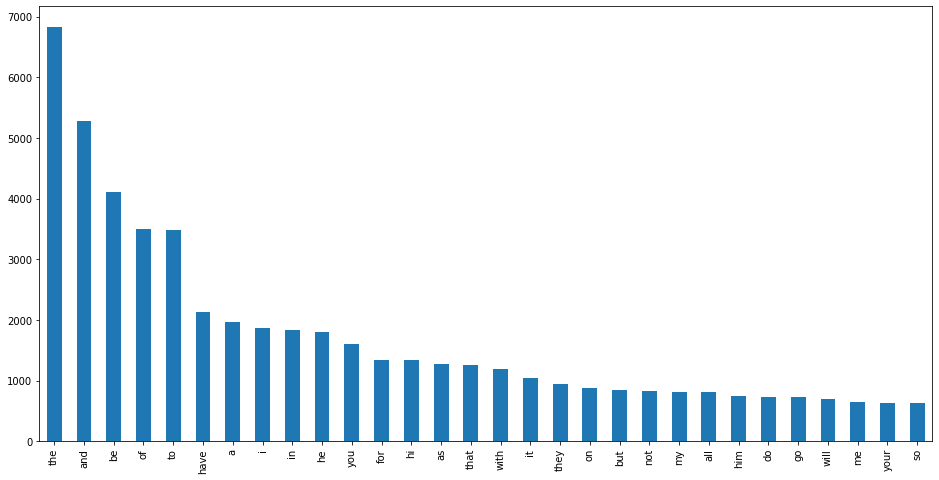

In [41]:
plt.figure(figsize=(16,8))
tokens = word_tokenize(T1_odyssey)
pd.Series(tokens).value_counts()[:30].plot(kind='bar')

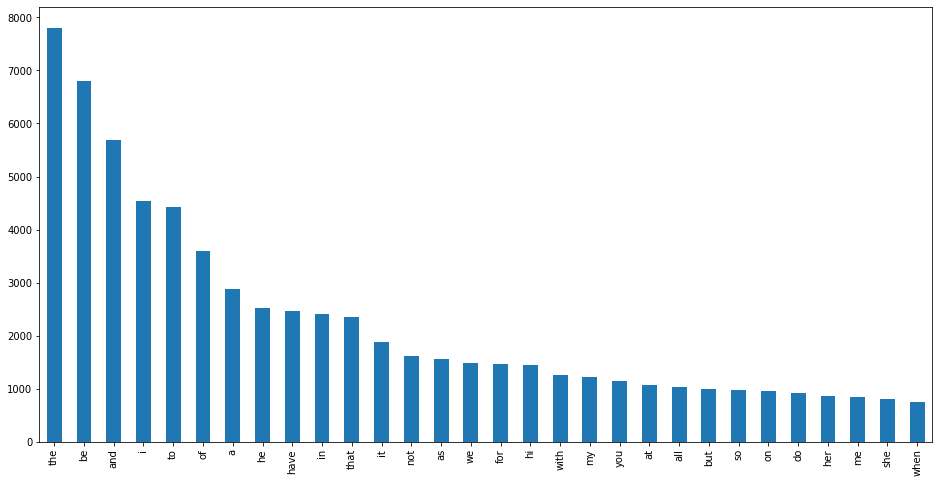

In [42]:
plt.figure(figsize=(16,8))
tokens = word_tokenize(T2_dracula)
pd.Series(tokens).value_counts()[:30].plot(kind='bar')

**4) Generating Word Cloud**

(-0.5, 1999.5, 1999.5, -0.5)

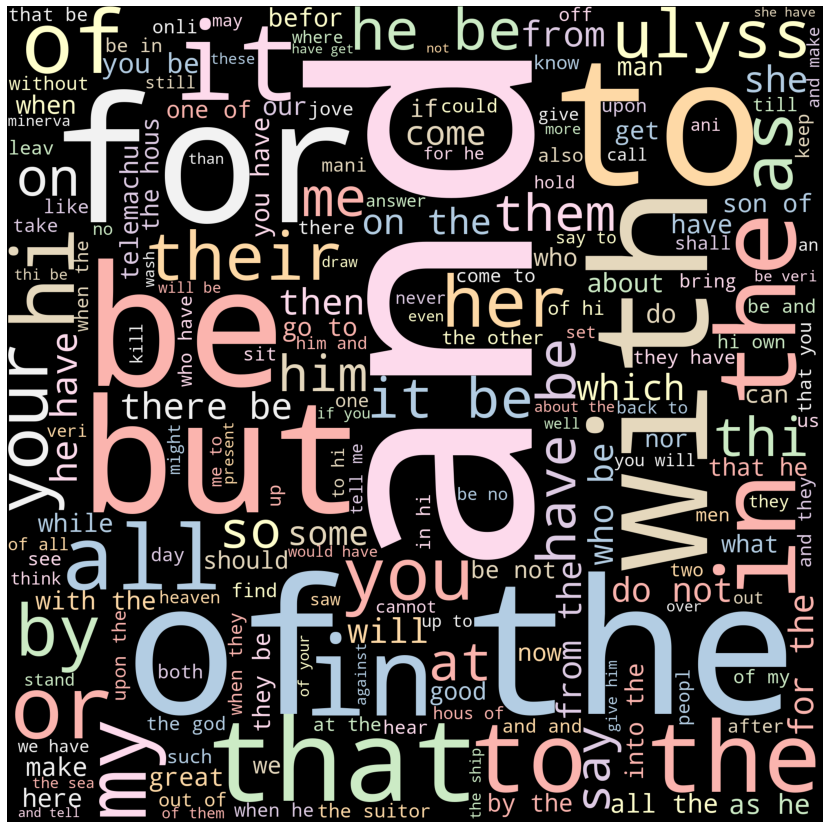

In [43]:
plt.figure(figsize=(15,15))
wordcloud = WordCloud(width = 2000, height = 2000,background_color ='black',stopwords = [], colormap='Pastel1').generate(T1_odyssey)
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 1999.5, 1999.5, -0.5)

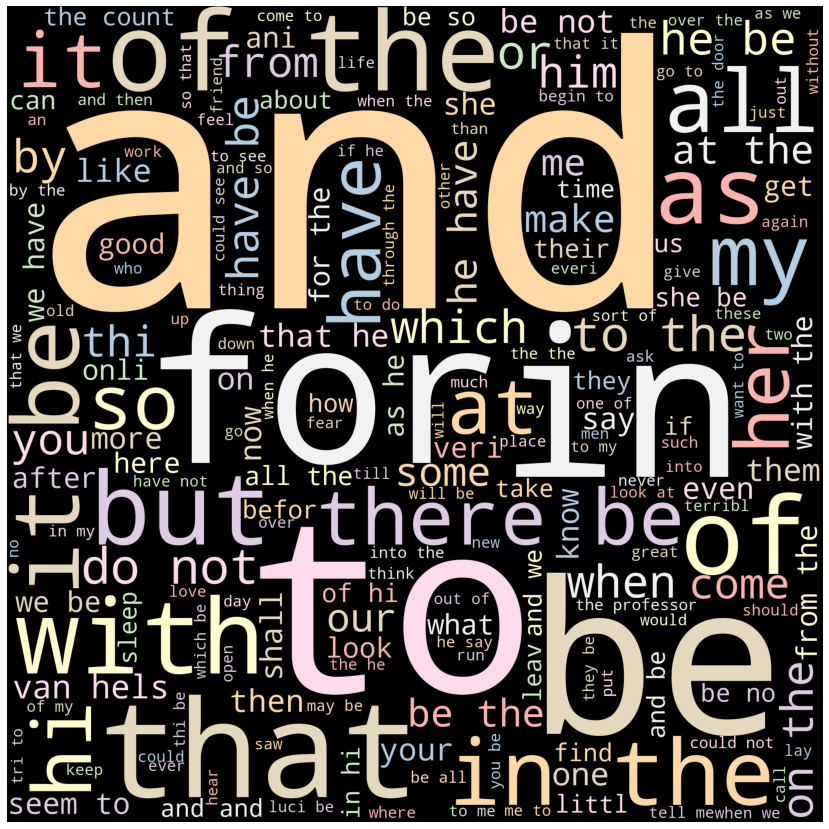

In [44]:
plt.figure(figsize=(18,15))
wordcloud = WordCloud(width = 2000, height = 2000,background_color ='black',stopwords = [], colormap='Pastel1').generate(T2_dracula)
plt.imshow(wordcloud)
plt.axis('off')

**5 ) Removing the STOPWORDS and again generating WordCloud to indentify potential difference between the wordclouds before and after removing the STOPWORDS.**

In [45]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [words for words in tokens if words not in stop_words]
    return ' '.join(tokens)

In [46]:
T1_odyssey_ = remove_stopwords(T1_odyssey)
T2_dracula_ = remove_stopwords(T2_dracula)

(-0.5, 1999.5, 1999.5, -0.5)

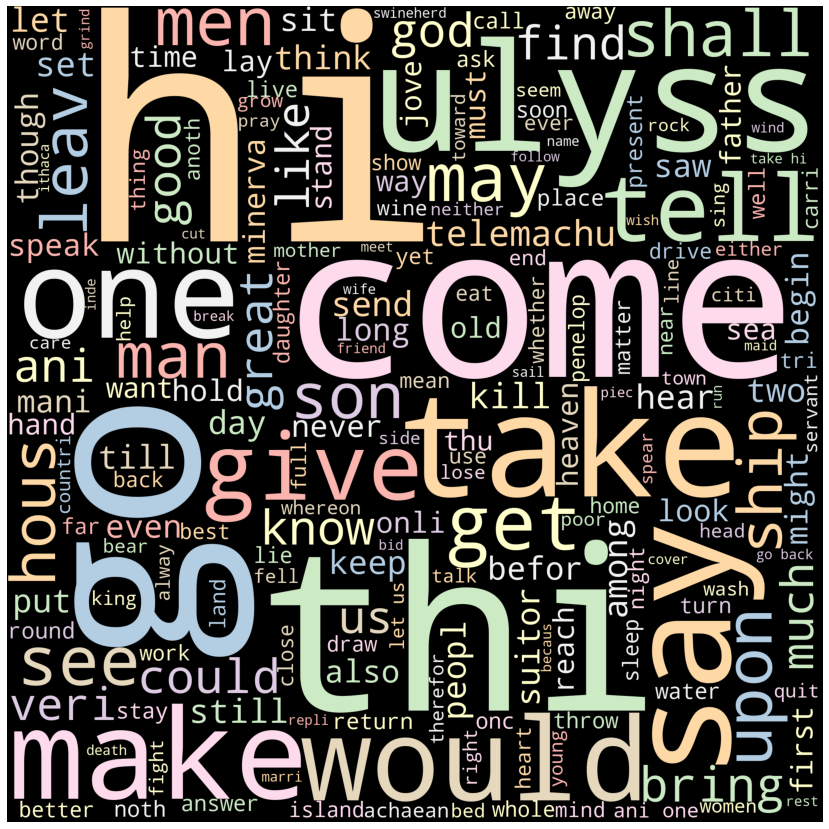

In [47]:
plt.figure(figsize=(15,15))
wordcloud = WordCloud(width = 2000, height = 2000,background_color ='black',stopwords = [], colormap='Pastel1').generate(T1_odyssey_)
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 1999.5, 1999.5, -0.5)

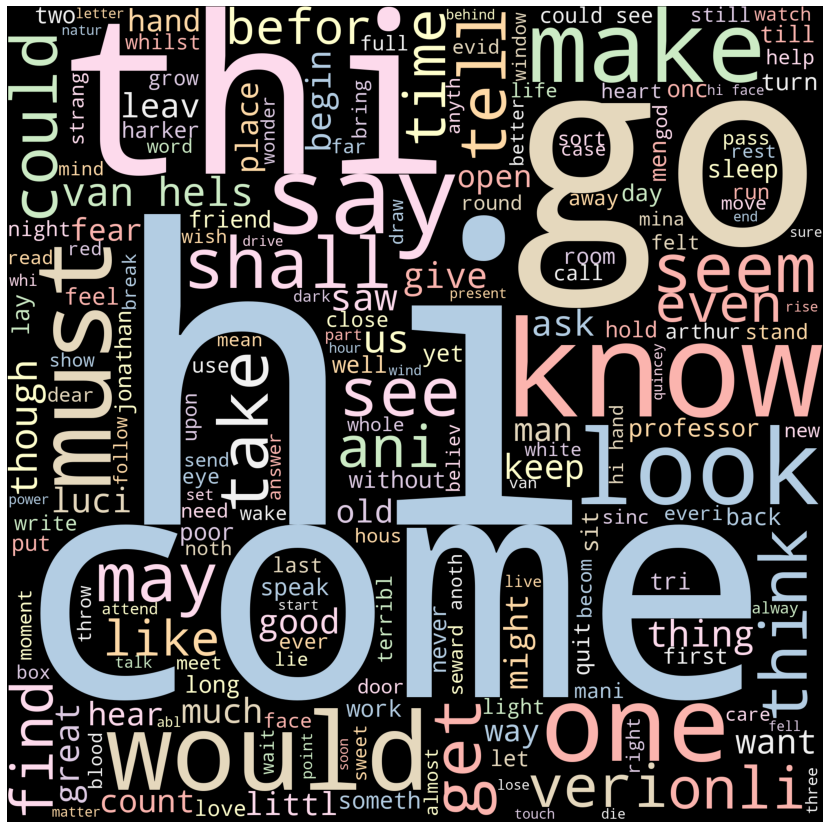

In [48]:
plt.figure(figsize=(18,15))
wordcloud = WordCloud(width = 2000, height = 2000,background_color ='black',stopwords = [], colormap='Pastel1').generate(T2_dracula_)
plt.imshow(wordcloud)
plt.axis('off')

**6) Evaluating the relationship between the word length and frequency for both T1_odessey and T2_dracula**

Before removing StopWords

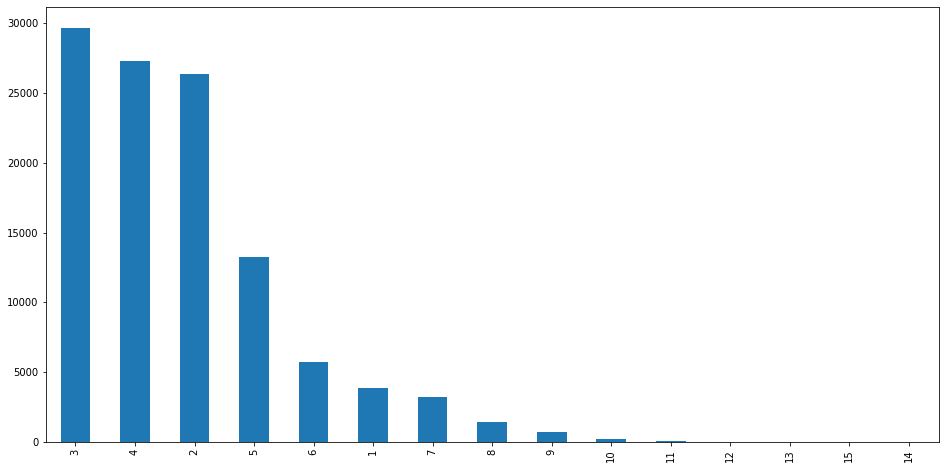

In [49]:
# For T1_odessey
plt.figure(figsize=(16,8))
tokens = word_tokenize(T1_odyssey)
length = [len(words) for words in tokens]
pd.Series(length).value_counts()[:30].plot(kind='bar')

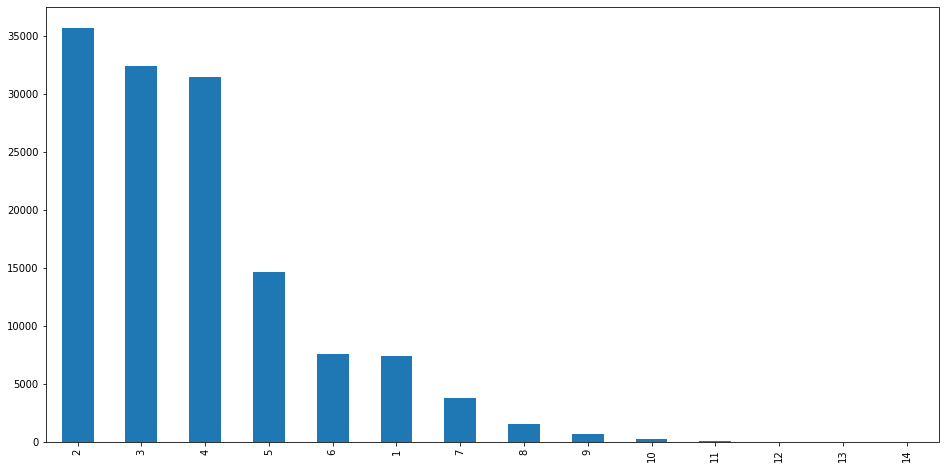

In [50]:
# For T2_dracula
plt.figure(figsize=(16,8))
tokens = word_tokenize(T2_dracula)
length = [len(words) for words in tokens]
pd.Series(length).value_counts()[:30].plot(kind='bar')

After removing StopWords

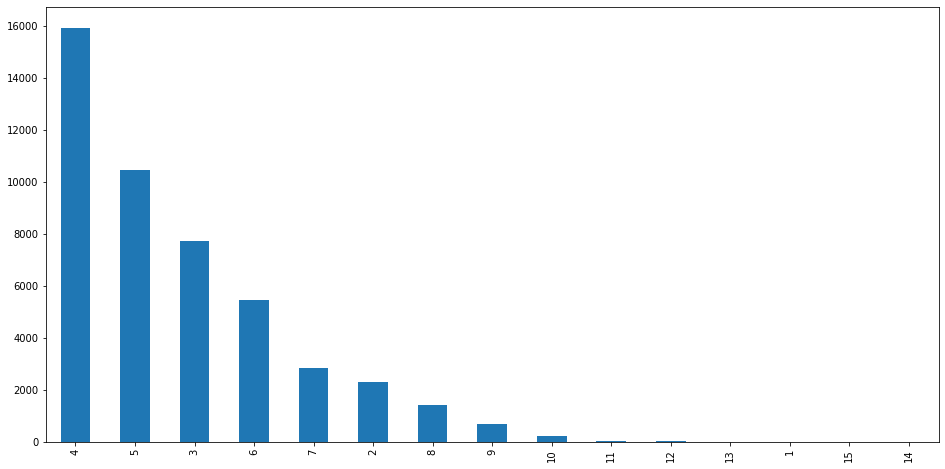

In [51]:
# For T1_odessey
plt.figure(figsize=(16,8))
tokens = word_tokenize(T1_odyssey_)
length = [len(words) for words in tokens]
pd.Series(length).value_counts()[:30].plot(kind='bar')

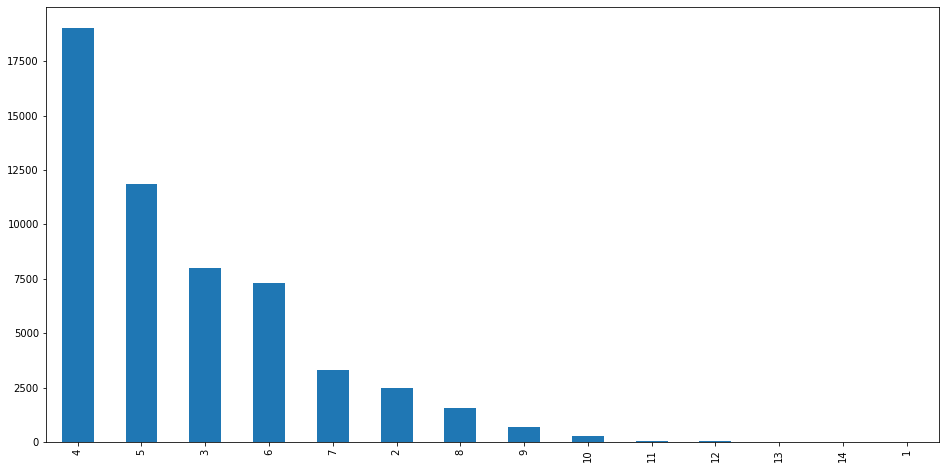

In [52]:
# For T2_dracula
plt.figure(figsize=(16,8))
tokens = word_tokenize(T2_dracula_)
length = [len(words) for words in tokens]
pd.Series(length).value_counts()[:30].plot(kind='bar')

**7) POS Tagging**

In [53]:
from collections import Counter


In [54]:
def tag_treebank(text):
    tokenized=nltk.word_tokenize(text)
    tagged=nltk.pos_tag(tokenized)
    return tagged

In [55]:
def get_counts(tags):
    counts = Counter( tag for word,  tag in tags)
    return counts

In [57]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [58]:
odessey_tags=tag_treebank(T1_odyssey)
odessey_pos_count=get_counts(odessey_tags)
dracula_tags=tag_treebank(T2_dracula)
dracula_pos_count=get_counts(dracula_tags)

In [59]:
len(odessey_pos_count)

32

In [60]:
odessey_pos_count

Counter({'$': 2,
         'CC': 6782,
         'CD': 774,
         'DT': 11036,
         'EX': 189,
         'FW': 31,
         'IN': 16283,
         'JJ': 7104,
         'JJR': 297,
         'JJS': 201,
         'MD': 2551,
         'NN': 20058,
         'NNP': 50,
         'NNS': 1344,
         'PDT': 248,
         'PRP': 8903,
         'PRP$': 2649,
         'RB': 5066,
         'RBR': 93,
         'RBS': 65,
         'RP': 668,
         'TO': 3479,
         'VB': 12382,
         'VBD': 755,
         'VBG': 204,
         'VBN': 2292,
         'VBP': 5173,
         'VBZ': 621,
         'WDT': 653,
         'WP': 959,
         'WP$': 43,
         'WRB': 981})

In [61]:
len(dracula_pos_count)

33

In [62]:
dracula_pos_count

Counter({"''": 1,
         'CC': 7210,
         'CD': 650,
         'DT': 13401,
         'EX': 362,
         'FW': 50,
         'IN': 19083,
         'JJ': 9373,
         'JJR': 426,
         'JJS': 210,
         'MD': 3394,
         'NN': 23928,
         'NNP': 26,
         'NNS': 1504,
         'PDT': 310,
         'PRP': 10607,
         'PRP$': 2915,
         'RB': 6733,
         'RBR': 192,
         'RBS': 47,
         'RP': 776,
         'TO': 4429,
         'UH': 2,
         'VB': 16014,
         'VBD': 886,
         'VBG': 102,
         'VBN': 2685,
         'VBP': 6873,
         'VBZ': 795,
         'WDT': 894,
         'WP': 719,
         'WP$': 30,
         'WRB': 1133})